In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
!pip install pyspellchecker==0.7.2

In [ ]:
!pip install --upgrade indexer

In [ ]:
pip install requirements.txt

In [ ]:
!pip freeze

In [5]:
import itertools
from autocorrect import Speller

In [13]:
!python3 -m nltk.downloader wordnet
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/runpy.py:126: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
unzip:  cannot find or open /root/nltk_data/corpora/wordnet.zip, /root/nltk_data/corpora/wordnet.zip.zip or /root/nltk_data/corpora/wordnet.zip.ZIP.


In [14]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d)


Command 'd)' unrecognized

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  wordnet


      Package wordnet is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  stopwords


      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  d



Download which package (l=list; x=cancel)?


  Identifier>  brown


      Package brown is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------


Downloader>  q


True

In [3]:
!pip install indexer==0.1.5

ERROR: Could not find a version that satisfies the requirement indexer==0.1.5 (from versions: 0.6.2)
ERROR: No matching distribution found for indexer==0.1.5


In [16]:
data = pd.read_csv("/kaggle/input/kaggle-wars-eclipse/train (1).csv")

In [17]:
data.head()

,Review,Rating
0,Great game when i was a kid I grew up watching...,5
1,Nice game,1
2,Balo game but bholo laguchi khelibaku gote khu...,5
3,This is the worst computer cheating game I've ...,1
4,Great,5


In [18]:
import seaborn as sns

<AxesSubplot: xlabel='Rating', ylabel='count'>

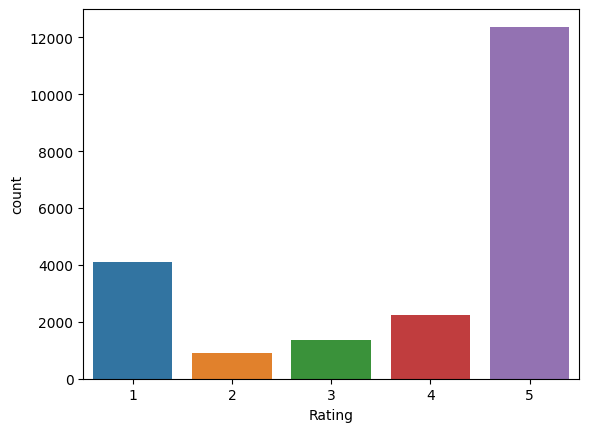

In [19]:
sns.countplot(x=data['Rating'])

In [23]:
import pandas as pd
import re
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
data ['Review']=data['Review'].str.lower()

In [25]:
data['Review']

0        great game when i was a kid i grew up watching...
1                                                nice game
2        balo game but bholo laguchi khelibaku gote khu...
3        this is the worst computer cheating game i've ...
4                                                    great
                               ...                        
20995            افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996                               very nice and enjoy!!!
20997    it has lots of different games depending on yo...
20998    has several very frustrating bugs not present ...
20999    paying for ads? i paid for no ads, yet i have ...
Name: Review, Length: 21000, dtype: object

In [26]:
def remove_punctuations(text):
    return re.sub(r'[!:.*()?,";]', '', text)

In [28]:
data['Review']=data['Review'].apply(remove_punctuations)

In [29]:
data['Review']

0        great game when i was a kid i grew up watching...
1                                                nice game
2        balo game but bholo laguchi khelibaku gote khu...
3        this is the worst computer cheating game i've ...
4                                                    great
                               ...                        
20995            افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996                                  very nice and enjoy
20997    it has lots of different games depending on yo...
20998    has several very frustrating bugs not present ...
20999    paying for ads i paid for no ads yet i have to...
Name: Review, Length: 21000, dtype: object

In [30]:
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

In [31]:
data['Review']=data['Review'].apply(remove_numbers)

In [32]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  
        u"\U0001F300-\U0001F5FF"  
        u"\U0001F680-\U0001F6FF"  
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [33]:
data['Review']=data['Review'].apply(remove_emojis)

In [34]:
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    if filtered_words:
        return ' '.join(filtered_words)
    else:
        return text

In [35]:
data['Review']=data['Review'].apply(remove_stopwords)

In [39]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
import nltk
from nltk.stem import WordNetLemmatizer

In [40]:
def lemmatize_words(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    normalized_text = [lemmatizer.lemmatize(word, pos='v') for word in word_tokens]
    return ' '.join(normalized_text)

# Function to normalize words using stemming
def stem_words(text):
    stemmer = PorterStemmer()
    word_tokens = word_tokenize(text)
    stemmed_text = [stemmer.stem(word) for word in word_tokens]
    return ' '.join(stemmed_text)

In [37]:
data['Review']=data['Review'].apply(stem_words)

In [42]:
data['Review']

0        great game kid grew watch pokémon buy pokemon ...
1                                                nice game
2        balo game bholo laguchi khelibaku gote khusi a...
3        worst comput cheat game i 've ever play unfort...
4                                                    great
                               ...                        
20995            افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996                                           nice enjoy
20997    lot differ game depend style also custom chara...
20998    sever frustrat bug present origin bad port sti...
20999    pay ad paid ad yet watch ad rotat block fraud ...
Name: Review, Length: 21000, dtype: object

In [43]:
chat_words_str = """
afaik=as far as i know
afk=away from keyboard
asap=as soon as possible
atk=at the keyboard
atm=at the moment
a3=anytime, anywhere, anyplace
bak=back at keyboard
bbl=be back later
bbs=be back soon
bfn=bye for now
b4n=bye for now
brb=be right back
brt=be right there
btw=by the way
b4=before
b4n=bye for now
cu=see you
cul8r=see you later
cya=see you
faq=frequently asked questions
fc=fingers crossed
fwiw=for what it's worth
fyi=for your information
gal=get a life
gg=good game
gn=good night
gmta=great minds think alike
gr8=great!
g9=genius
ic=i see
icq=i seek you (also a chat program)
ilu=ilu: i love you
imho=in my honest/humble opinion
imo=in my opinion
iow=in other words
irl=in real life
kiss=keep it simple, stupid
ldr=long distance relationship
lmao=laugh my a.. off
lol=laughing out loud
ltns=long time no see
l8r=later
mte=my thoughts exactly
m8=mate
nrn=no reply necessary
oic=oh i see
pita=pain in the a..
prt=party
prw=parents are watching
rofl=rolling on the floor laughing
roflol=rolling on the floor laughing out loud
rotflmao=rolling on the floor laughing my a.. off
sk8=skate
stats=your sex and age
asl=age, sex, location
thx=thank you
ttfn=ta-ta for now!
ttyl=talk to you later
u=you
u2=you too
u4e=yours for ever
wb=welcome back
wtf=what the f...
wtg=way to go!
wuf=where are you from?
w8=wait...
7k=sick:-d laugher
"""
chat_words_map_dict = {}
chat_words_list = []
for line in chat_words_str.split("\n"):
    if line != "":
        cw = line.split("=")[0]
        cw_expanded = line.split("=")[1]
        chat_words_list.append(cw)
        chat_words_map_dict[cw] = cw_expanded
chat_words_list = set(chat_words_list)

def chat_words_conversion(text):
    new_text = []
    for w in text.split():
        if w.upper() in chat_words_list:
            new_text.append(chat_words_map_dict[w.upper()])
        else:
            new_text.append(w)
    return " ".join(new_text)

In [44]:
data['Review']=data['Review'].apply(chat_words_conversion)

In [46]:
data.head(20)

,Review,Rating
0,great game kid grew watch pokémon buy pokemon ...,5
1,nice game,1
2,balo game bholo laguchi khelibaku gote khusi a...,5
3,worst comput cheat game i 've ever play unfort...,1
4,great,5
5,good port control bit clunki,4
6,% awesom,5
7,love trist gameto,5
8,behetereen game hai sab seedh tehelt reht hai,5
9,worst matchmak ever straight matchmak one team...,1


In [48]:
import itertools
from autocorrect import Speller
text=data['Review']
text_correction = ''.join(''.join(s)[:2] for _, s in itertools.groupby(text))
print("Normal Text:n{}".format(text_correction))
spell = Speller(lang='en')
ans = spell(text_correction)
print("After correcting text:n{}".format(ans))

Normal Text:ngood port control bit clunki
After correcting text:ngood port control bit clunky


In [54]:
spell1 = Speller

In [55]:
def convert_emoji_to_text(text):
    text_with_emojis = emoji.demojize(text)
    return text_with_emojis

def fix_corrupted_emojis(text):
    decoded_text = text.encode('unicode_escape').decode()
    emoji_text = emoji.emojize(decoded_text)
    return emoji_text



def unicode_to_emoji(text):
    decoded_text = text.encode('utf-8').decode('unicode_escape')
    emoji_text = emoji.emojize(decoded_text)
    return emoji_text

In [56]:
data['Review'] = data['Review'].apply(fix_corrupted_emojis)
data['Review'] = data['Review'].apply(unicode_to_emoji)
data['Review'] = data['Review'].apply(convert_emoji_to_text)

In [58]:
data.head(20)

,Review,Rating
0,great game kid grew watch pokémon buy pokemon ...,5
1,nice game,1
2,balo game bholo laguchi khelibaku gote khusi a...,5
3,worst comput cheat game i 've ever play unfort...,1
4,great,5
5,good port control bit clunki,4
6,% awesom,5
7,love trist gameto,5
8,behetereen game hai sab seedh tehelt reht hai,5
9,worst matchmak ever straight matchmak one team...,1


In [59]:
datac = pd.read_csv("/kaggle/input/cleaned-kaggle-wars-dataset/cleaned_train.csv")

In [61]:
datac['Review']

0        great game when i wa a kid i grow up watch pok...
1                                                nice game
2        balo game but bholo laguchi khelibaku gote khu...
3        thi be the worst comput cheat game i 've ever ...
4                                                    great
                               ...                        
20995            افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996                                  veri nice and enjoy
20997    it ha lot of differ game depend on your style ...
20998    ha sever veri frustrat bug not present in the ...
20999    pay for ad i pay for no ad yet i have to watch...
Name: Review, Length: 21000, dtype: object

In [62]:
data['Review']

0        great game kid grew watch pokémon buy pokemon ...
1                                                nice game
2        balo game bholo laguchi khelibaku gote khusi a...
3        worst comput cheat game i 've ever play unfort...
4                                                    great
                               ...                        
20995            افضل لعبة و لكن اريد ان يكون شجرة الجواهر
20996                                           nice enjoy
20997    lot differ game depend style also custom chara...
20998    sever frustrat bug present origin bad port sti...
20999    pay ad paid ad yet watch ad rotat block fraud ...
Name: Review, Length: 21000, dtype: object

In [63]:
data.to_csv('cleaned_train.csv', index=False)

In [64]:
data = pd.read_csv('/kaggle/input/kaggle-wars-eclipse/test (2).csv')

In [65]:
data ['Review']=data['Review'].str.lower()
# data['Review'] = data['Review'].apply(correct_spellings)
data['Review'] = data['Review'].apply(fix_corrupted_emojis)
data['Review'] = data['Review'].apply(unicode_to_emoji)
data['Review'] = data['Review'].apply(convert_emoji_to_text)
data['Review'] = data['Review'].apply(chat_words_conversion)
# data['Review'] = data['Review'].apply(remove_numbers)
# data['Review'] = data['Review'].apply(remove_stopwords)
data['Review'] = data['Review'].apply(remove_punctuations)

In [67]:
data['Review'] = data['Review'].apply(stem_words)

In [71]:
data.to_csv('cleaned_test.csv', index=False)

In [68]:
from googletrans import Translator

def translate_to_english(text):
    translator = Translator()
    return translator.translate(text, dest='en').text

In [69]:
import pandas as pd

train_df = pd.read_csv('/kaggle/input/kaggle-wars-eclipse/train (1).csv')

test_df = pd.read_csv('/kaggle/input/kaggle-wars-eclipse/test (2).csv')

reviews_train = train_df['Review']
ratings_train = train_df['Rating']

review_rating_dict = dict(zip(reviews_train, ratings_train))

test_df['Rating'] = test_df['Review'].apply(lambda x: review_rating_dict.get(x, 0))

test_df.to_csv('test_with_ratings.csv', index=False)

In [99]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, cohen_kappa_score

train_df = pd.read_csv('/kaggle/working/cleaned_train.csv')
test_df = pd.read_csv('/kaggle/working/cleaned_test.csv')
train_df.fillna("", inplace=True)

train_texts = train_df['Review'].values
train_labels = train_df['Rating'].values


test_texts = test_df['Review'].values

tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)

max_length = 100 
train_data = pad_sequences(train_sequences, maxlen=max_length, padding='post')
test_data = pad_sequences(test_sequences, maxlen=max_length, padding='post')

train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[1], 1))
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[1], 1))


train_labels_cat = tf.keras.utils.to_categorical(train_labels - 1, num_classes=5)  

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_length))
model.add(Conv1D(128, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
# model.add(Conv1D(64, 5, activation='relu'))
# model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3)


model.fit(train_data, train_labels_cat, epochs=40, batch_size=64, callbacks=early_stopping)



val_preds = model.predict(train_data)
val_preds = np.argmax(val_preds, axis=1) + 1  
val_kappa = cohen_kappa_score(train_labels, val_preds, weights='quadratic')
print("Validation Quadratic Weighted Kappa:", val_kappa)
test_predictions = model.predict(test_data)
test_predicted_labels = np.argmax(test_predictions, axis=1) + 1 

Epoch 1/40
329/329 [==============================] - 14s 38ms/step - loss: 0.9446 - accuracy: 0.6798
Epoch 2/40
329/329 [==============================] - 12s 37ms/step - loss: 0.5838 - accuracy: 0.8047
Epoch 3/40
329/329 [==============================] - 13s 38ms/step - loss: 0.3857 - accuracy: 0.8784
Epoch 4/40
329/329 [==============================] - 12s 37ms/step - loss: 0.2870 - accuracy: 0.9139
Epoch 5/40
329/329 [==============================] - 12s 37ms/step - loss: 0.2405 - accuracy: 0.9297
Epoch 6/40
329/329 [==============================] - 13s 39ms/step - loss: 0.2142 - accuracy: 0.9379
Epoch 7/40
329/329 [==============================] - 12s 38ms/step - loss: 0.2042 - accuracy: 0.9404
Epoch 8/40
329/329 [==============================] - 13s 39ms/step - loss: 0.1917 - accuracy: 0.9444
Epoch 9/40
329/329 [==============================] - 12s 37ms/step - loss: 0.1861 - accuracy: 0.9465
Epoch 10/40
329/329 [==============================] - 13s 38ms/step - loss: 0.181

In [85]:
len(test_predictions)

7000

In [95]:
len(test_predicted_labels)

7000

In [96]:
result_df = pd.DataFrame({'Id': range(len(test_predicted_labels)), 'Rating': test_predicted_labels})

In [97]:
result_df.to_csv('sample_submission.csv', index=False)

In [83]:
sampleee = pd.read_csv("/kaggle/input/kaggle-wars-eclipse/sample_submission.csv")

In [89]:
train_df = pd.read_csv("/kaggle/working/cleaned_train.csv")
test_df = pd.read_csv("/kaggle/working/cleaned_test.csv")
train_df.fillna("", inplace=True)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(train_df["Review"])
X_test = vectorizer.transform(test_df["Review"])